#Capítulo 3 - Análise Descritiva de Dados


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


##Bases de Dados do Capitulo

In [ ]:
nomesColunasMamo = ["BI-RADS","Idade","Forma","Margem","Densidade","Severidade"]
dfMamo = pd.read_csv('https://raw.githubusercontent.com/xbarretox/DM-AD/main/mammographic_masses.csv', names = nomesColunasMamo)


###Resumo do DataFrame

In [ ]:
dfMamo = dfMamo[:80]


In [ ]:
dfMamo["Idade"]

0     67
1     43
2     58
3     28
4     74
      ..
75    25
76    74
77    64
78    60
79    67
Name: Idade, Length: 80, dtype: object

##Análise Descritiva dos Dados

1.   Distribuição de Frequência
2.   Visualização de Dados
3.   Medidas






###Distribuiçao de Frequência

####Ilustrando a Distribuição de Frequência considerando as **Idades**

In [ ]:
colunaDistFreq = "Idade"

####Setando um número de Classes. Escolhido a quantidade que for melhor (Sugerido de 5 a 20)

In [ ]:
numClasses = 5

####Amplitude da Classe

In [ ]:
#Amplitude = MaiorValor - MenorValor

##Retirando as linhas cuja severidade seja um valor inválido
dfValida = dfMamo[dfMamo["Severidade"]!='?']

maiorValor = int(dfValida[colunaDistFreq].max())
menorValor = int(dfValida[colunaDistFreq].min())

amplitudeIdades = maiorValor - menorValor

amplitudeIdades

58

####Limites Inferiores

In [ ]:
amplitudeClasse = amplitudeIdades/numClasses
limiteInfInicial = menorValor
limiteInfClasse = []
limiteInfClasse.append(limiteInfInicial)

print("Limites Inferiores das Classes: ")
for i in range(numClasses-1):
  limiteInfClasse.append(math.ceil(limiteInfClasse[-1]+amplitudeClasse))

for i in range(len(limiteInfClasse)):
  print(" Classe "+str(i+1)+": "+str(limiteInfClasse[i]))


Limites Inferiores das Classes: 
 Classe 1: 23
 Classe 2: 35
 Classe 3: 47
 Classe 4: 59
 Classe 5: 71


####Limites Superiores

In [ ]:
amplitudeClasse = amplitudeIdades/numClasses
limiteInfInicial = menorValor
limiteSuperiorClasse = []
limiteSuperiorClasse.append(math.floor(limiteInfInicial+amplitudeClasse))

print("Limites Superiores das Classes: ")
for i in range(numClasses-1):
  limiteSuperiorClasse.append(math.ceil(limiteSuperiorClasse[-1]+amplitudeClasse))

for i in range(len(limiteSuperiorClasse)):
  print(" Classe "+str(i+1)+": "+str(limiteSuperiorClasse[i]))



Limites Superiores das Classes: 
 Classe 1: 34
 Classe 2: 46
 Classe 3: 58
 Classe 4: 70
 Classe 5: 82


####Rótulo para os valores do atributo

In [ ]:
rotulos = []

for i in range(len(dfMamo)):
  #Variavel idade recebe a idade atual do Dataframe
  idade = int(dfMamo.loc[i,'Idade'])
  #Descobrindo a classe que se encaixa a idade
  for j in range(numClasses):
    if limiteInfClasse[j]<=idade and idade <= limiteSuperiorClasse[j]:
      rotulos.append(j+1)
      break

#Transformando a lista rotulos para uma serie , por ser mais facil de fazer filtragem
rotulos = pd.Series(rotulos, dtype=int)
print(rotulos)

0     4
1     2
2     3
3     1
4     5
     ..
75    1
76    5
77    4
78    4
79    4
Length: 80, dtype: int64


####Resumo da Distribuição de Frequência

In [ ]:
#Inicializando uma variavel do tipo DataFrame contendo apenas os valores das colunas
resumoDistrFrequencia = pd.DataFrame(columns=["Classe","Limite Inferior","Ponto Médio","Limite Superior", "Frequência Absoluta", "Frequência Relativa", "Frequência Acumulada Absoluta", "Frequência Acumulada Relativa"])

#Percorrendo atraves do numero de Classes
for ind in range(numClasses):
  #Dicionario de insercao no Dataframe
  dictInsert = {  
    "Classe": (ind+1),
    "Limite Inferior": (limiteInfClasse[ind]),
    "Ponto Médio": ((limiteSuperiorClasse[ind]+limiteInfClasse[ind])/2),
    "Limite Superior": limiteSuperiorClasse[ind], 
    "Frequência Absoluta": len(rotulos[rotulos==(ind+1)]), 
    "Frequência Relativa":len(rotulos[rotulos==(ind+1)])/len(rotulos)*100, 
    "Frequência Acumulada Absoluta": sum(resumoDistrFrequencia["Frequência Absoluta"]) + len(rotulos[rotulos==(ind+1)]) , 
    "Frequência Acumulada Relativa": (sum(resumoDistrFrequencia["Frequência Absoluta"]) + len(rotulos[rotulos==(ind+1)]))/len(rotulos)*100
  } 
  resumoDistrFrequencia = resumoDistrFrequencia.append(dictInsert,ignore_index=True)

resumoDistrFrequencia = resumoDistrFrequencia.astype({
    "Classe": int,
    "Limite Inferior": int,
    "Ponto Médio": float,
    "Limite Superior": int, 
    "Frequência Absoluta": int, 
    "Frequência Relativa":float, 
    "Frequência Acumulada Absoluta":int, 
    "Frequência Acumulada Relativa":float
})

resumoDistrFrequencia

,Classe,Limite Inferior,Ponto Médio,Limite Superior,Frequência Absoluta,Frequência Relativa,Frequência Acumulada Absoluta,Frequência Acumulada Relativa
0,1,23,28.5,34,5,6.25,5,6.25
1,2,35,40.5,46,15,18.75,20,25.00
2,3,47,52.5,58,20,25.00,40,50.00
3,4,59,64.5,70,28,35.00,68,85.00
4,5,71,76.5,82,12,15.00,80,100.00


###Visualização de Dados

####Histograma

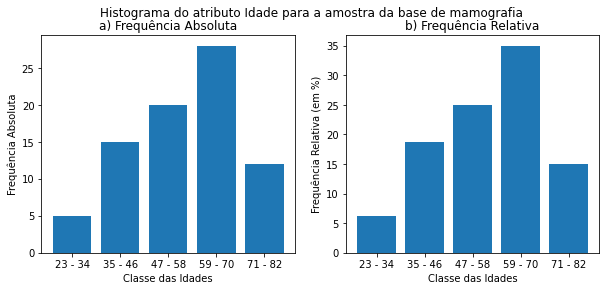

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
classeIdade =  [str(resumoDistrFrequencia.loc[i,"Limite Inferior"])+" - "+str(resumoDistrFrequencia.loc[i,"Limite Superior"]) for i in range(len(resumoDistrFrequencia.values))]

axes[0].bar(classeIdade,resumoDistrFrequencia["Frequência Absoluta"])
axes[0].set_title("a) Frequência Absoluta")
axes[0].set(xlabel = "Classe das Idades", ylabel = "Frequência Absoluta")
axes[1].bar(classeIdade,resumoDistrFrequencia["Frequência Relativa"])
axes[1].set_title("b) Frequência Relativa")
axes[1].set(xlabel = "Classe das Idades", ylabel = "Frequência Relativa (em %)")


fig.suptitle("Histograma do atributo Idade para a amostra da base de mamografia")
fig.show()


####Polígonos de Frequência


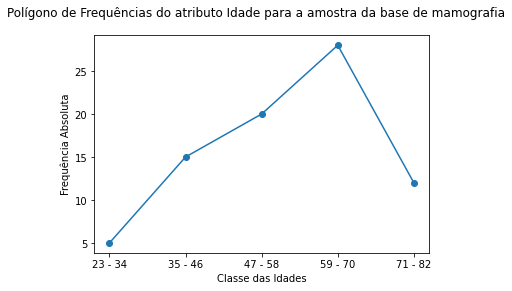

In [ ]:
classeIdade =  [str(resumoDistrFrequencia.loc[i,"Limite Inferior"])+" - "+str(resumoDistrFrequencia.loc[i,"Limite Superior"]) for i in range(len(resumoDistrFrequencia.values))]

plt.plot(classeIdade,resumoDistrFrequencia["Frequência Absoluta"],marker='o')
plt.xlabel("Classe das Idades")
plt.ylabel("Frequência Absoluta")

plt.suptitle("Polígono de Frequências do atributo Idade para a amostra da base de mamografia")
plt.show()


####Ogiva

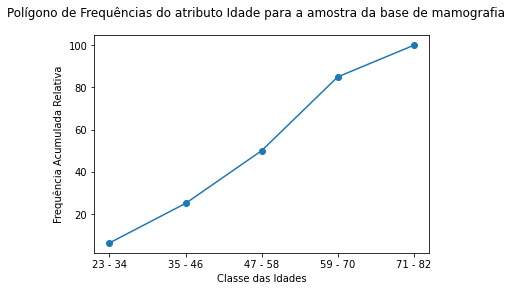

In [ ]:
classeIdade =  [str(resumoDistrFrequencia.loc[i,"Limite Inferior"])+" - "+str(resumoDistrFrequencia.loc[i,"Limite Superior"]) for i in range(len(resumoDistrFrequencia.values))]

plt.plot(classeIdade,resumoDistrFrequencia["Frequência Acumulada Relativa"],marker='o')
plt.xlabel("Classe das Idades")
plt.ylabel("Frequência Acumulada Relativa")

plt.suptitle("Polígono de Frequências do atributo Idade para a amostra da base de mamografia")
plt.show()

####Gráfico de Pareto

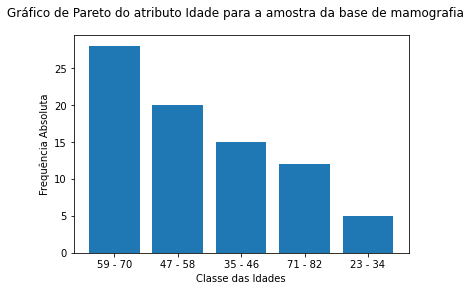

In [ ]:

classeIdade =  [str(resumoDistrFrequencia.loc[i-1,"Limite Inferior"])+" - "+str(resumoDistrFrequencia.loc[i-1,"Limite Superior"]) for i in resumoDistrFrequencia.sort_values(by='Frequência Absoluta',ascending=False)["Classe"].values]

plt.bar(classeIdade,resumoDistrFrequencia.sort_values(by='Frequência Absoluta',ascending=False)["Frequência Absoluta"])
plt.xlabel("Classe das Idades")
plt.ylabel("Frequência Absoluta")

plt.suptitle("Gráfico de Pareto do atributo Idade para a amostra da base de mamografia")
plt.show()


####Gráfico de Setores

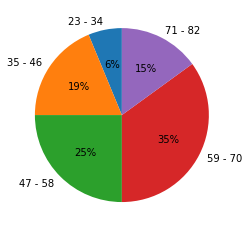

In [ ]:
classeIdade =  [str(resumoDistrFrequencia.loc[i,"Limite Inferior"])+" - "+str(resumoDistrFrequencia.loc[i,"Limite Superior"])  for i in range(len(resumoDistrFrequencia.values))]

plt.pie(x=resumoDistrFrequencia['Frequência Relativa'], labels=classeIdade, autopct='%.0f%%',startangle=90)

plt.show()

####Gráfico de Dispersão

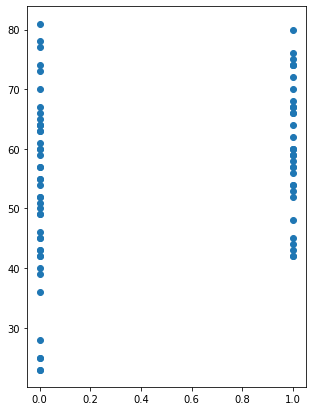

In [ ]:
dfAuxiliar = dfMamo.sort_values(by="Idade")
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})
plt.scatter(dfAuxiliar["Severidade"], dfAuxiliar["Idade"])
plt.gcf().set_size_inches(5, 7) 
plt.show()


###Medidas Resumo

####Medidas de Tendência Central

#####Média

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].mean()

56.4875

#####Mediana

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].median()

58.5

#####Ponto Médio

In [ ]:
(maiorValor+menorValor)/2

52.0

#####Moda

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].mode()

0    60
dtype: int64

####Medidas de Dispersão

#####Amplitude

In [ ]:
maiorValor-menorValor

58

#####Desvio Padrão

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].std()

13.62703358415901

#####Variância

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].var()

185.69604430379755

#####Coeficiente de Variação

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].std()/dfAuxiliar["Idade"].mean()*100

24.123980675652152

####Medidas de Forma

#####Assimetria

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].skew()

-0.5213419491722785

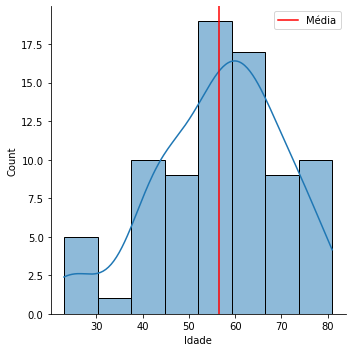

In [ ]:
dfAuxiliar = dfMamo.sort_values('Idade',ascending=True)
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})
plot = sns.displot(dfAuxiliar["Idade"],kde=True)
plt.axvline(dfAuxiliar["Idade"].mean(),0,1, color='r', label="Média")
plt.legend()
plt.show()

#####Curtose

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].kurtosis()

0.0009262394704530053

####Medidas de Posição Relativa

#####Quantis

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].quantile(0.25)

47.5

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].quantile(0.5)

58.5

In [ ]:
dfAuxiliar = dfMamo
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})

dfAuxiliar["Idade"].quantile(0.75)

66.0

####Medida de Associaçao

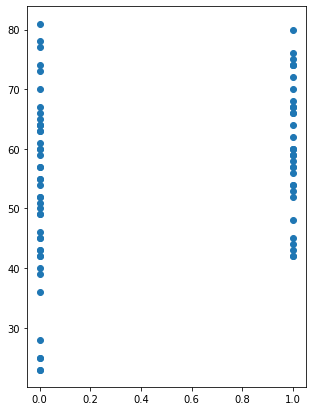

In [ ]:
dfAuxiliar = dfMamo.sort_values(by="Idade")
dfAuxiliar = dfAuxiliar.astype({
    "Idade":int
})
plt.scatter(dfAuxiliar["Severidade"], dfAuxiliar["Idade"])
plt.gcf().set_size_inches(5, 7) 
plt.show()